In [1]:
#import necessary packages
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

def ecdf(data):
    '''Function gives the x and y of a Cumulative distribution function'''
    x= np.sort(np.array(data))
    n=float(len(data))
    y= (np.arange(1,n+1))/n
    return x,y
    

In [2]:
df= pd.read_pickle('working_data.pkl')
df.head()

,male,age,hypertension,heart_disease,ever_married,work_type,urban_resident,avg_glucose_level,bmi,has_smoked,stroke,bmi_class,glucose_class,risk_factor
id,,,,,,,,,,,,,,
30468,1,58.0,1,0,1,Private,1,87.96,39.2,0,0,Obese,41st-60th,One
56543,0,70.0,0,0,1,Private,0,69.04,35.9,0,0,Obese,0-20th,Neither
52800,0,52.0,0,0,1,Private,1,77.59,17.7,0,0,Underweight,21st-40th,Neither
41413,0,75.0,0,1,1,Self-employed,0,243.53,27.0,0,0,Overweight,81st-100th,One
15266,0,32.0,0,0,1,Private,0,77.67,32.3,1,0,Obese,21st-40th,Neither


In [3]:
df.describe()

,male,age,hypertension,heart_disease,ever_married,urban_resident,avg_glucose_level,bmi,has_smoked,stroke
count,27045.000000,27045.000000,27045.000000,27045.000000,27045.000000,27045.00000,27045.000000,27045.000000,27045.000000,27045.000000
mean,0.382991,50.073322,0.119652,0.056055,0.801109,0.50305,107.402281,30.415330,0.223923,0.020263
std,0.486125,17.147426,0.324561,0.230032,0.399173,0.50000,46.205596,7.136071,0.416879,0.140900
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.00000,55.010000,10.100000,0.000000,0.000000
25%,0.000000,36.000000,0.000000,0.000000,1.000000,0.00000,77.830000,25.400000,0.000000,0.000000
50%,0.000000,50.000000,0.000000,0.000000,1.000000,1.00000,92.500000,29.300000,0.000000,0.000000
75%,1.000000,63.000000,0.000000,0.000000,1.000000,1.00000,114.830000,34.100000,0.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.00000,291.050000,92.000000,1.000000,1.000000


First, I want to do some general EDA, so I am going to put the data in different grous in an attempt to understand the causes of stroke and how we can predict future strokes.

In [4]:
#Create groupby object for stroke
str_group=df.groupby('stroke').mean()
str_group


,male,age,hypertension,heart_disease,ever_married,urban_resident,avg_glucose_level,bmi,has_smoked
stroke,,,,,,,,,
0,0.382043,49.692343,0.116126,0.052647,0.799147,0.502925,106.913309,30.427124,0.224327
1,0.428832,68.494526,0.290146,0.220803,0.895985,0.509124,131.045182,29.845073,0.204380


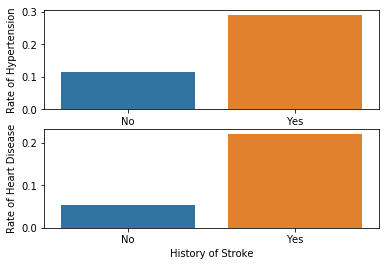

The correlation between hypertension and stroke is 0.075546098878 and the correlation between heart disease and stroke is 0.10299901651


In [5]:
#create subplots
f, axes = plt.subplots(2, 1)
#bar graph of percentage of hypertension by whether one has had a stroke
sns.barplot(x=str_group.index, y=str_group.hypertension, ax=axes[0])
axes[0].set(ylabel='Rate of Hypertension',  xlabel='History of Stroke')
#change xticks
plt.sca(axes[0])
plt.xticks(np.arange(2),['No', 'Yes'])
#bar graph of percentage of heart disease by whether one has had a stroke
sns.barplot(x=str_group.index, y=str_group.heart_disease, ax=axes[1])
axes[1].set(ylabel='Rate of Heart Disease', xlabel='History of Stroke')
#change xticks
plt.sca(axes[1])
plt.xticks(np.arange(2),['No', 'Yes'])
plt.show()
print('The correlation between hypertension and stroke is {} and the correlation between heart disease and stroke is {}'
     ).format(np.corrcoef(df.hypertension, df.stroke)[0,1],np.corrcoef(df.heart_disease, df.stroke)[0,1]),


In [59]:
#create groupby object grouped by risk factor
risk= df.groupby('risk_factor').mean()
risk

,male,age,hypertension,heart_disease,ever_married,urban_resident,avg_glucose_level,bmi,has_smoked,stroke
risk_factor,,,,,,,,,,
Both,0.569682,69.276284,1.000000,1.000000,0.916870,0.520782,139.307188,31.555990,0.261614,0.088020
Neither,0.365034,47.650692,0.000000,0.000000,0.779799,0.504581,103.597939,30.090041,0.226015,0.013391
One,0.467209,62.057194,0.718607,0.281393,0.912049,0.492374,126.039059,32.173894,0.207931,0.052872


Text(0,0.5,'Rate of Stroke')

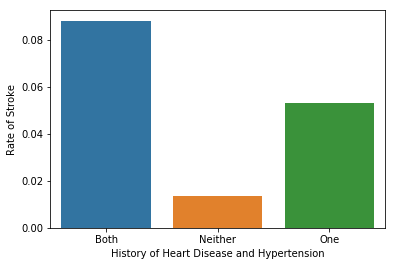

In [60]:
#Create bar graph risk factor and percentage of people who have had a stroke
sns.barplot(x=risk.index, y=risk.stroke)
plt.xlabel('History of Heart Disease and Hypertension')
plt.ylabel('Rate of Stroke')

As one would expect, having both risk factors greatly increases your risk over someone who has none.



It appears stroke victims are older and are much more likely to have high blood pressure and heart disease than those who have never suffered a stroke. Let's look at how the other varibles affect all three of these conditions. This may give us insight into what the underlying risk factors for stroke may be.

In [61]:
#create a groupby object with 10 year age containers
age_groups= df.groupby([df.age.astype(float)//10*10])
gmean=age_groups.mean()
gmean.index= ['20-29', '30-39', '40-49', '50-59', '60-69','70-79', '80+' ]
gmean

,male,age,hypertension,heart_disease,ever_married,urban_resident,avg_glucose_level,bmi,has_smoked,stroke
20-29,0.313658,24.652507,0.009385,0.000741,0.314646,0.504075,93.652867,28.404816,0.258088,0.000247
30-39,0.360066,34.561864,0.042347,0.003075,0.744736,0.493731,97.926220,30.684268,0.255974,0.003075
40-49,0.390269,44.634767,0.090046,0.020392,0.887341,0.510600,101.710537,31.282596,0.259035,0.005653
50-59,0.400976,54.377511,0.137225,0.048433,0.930730,0.499343,110.122326,31.399700,0.241412,0.016707
60-69,0.416085,64.124248,0.195521,0.097520,0.942451,0.509993,118.505456,31.302095,0.192873,0.026728
70-79,0.414657,74.858689,0.229746,0.157390,0.927335,0.500309,121.820538,29.400526,0.138219,0.066172
80+,0.388385,80.921960,0.260436,0.205989,0.887477,0.500907,122.545744,27.750726,0.101633,0.083485


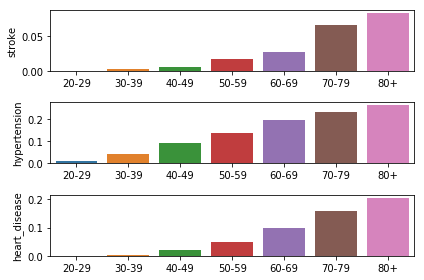

In [62]:
#Create subplots
f, axes = plt.subplots(3, 1)
#Bar graph of the percentage of each age group to suffer a stroke
sns.barplot(x=gmean.index, y=gmean.stroke, ax=axes[0] )
#Bar graph of the percentage of each age group to have high blood pressure
sns.barplot(x=gmean.index, y=gmean.hypertension, ax=axes[1])
#Bar graph of the percentage of each age group to suffer from heart disease
sns.barplot(x=gmean.index, y=gmean.heart_disease, ax = axes[2])
f.tight_layout()
plt.show()

It appears age is a huge factor in predicting stroke, hypertension and heart disease. This makes sense because older people are more susceptible to most medical conditions. We should keep an eye out to see how age related other variables are. 

In [63]:
#create groupby object for bmi class
grbmimean=df.groupby('bmi_class').mean()

grbmimean

,male,age,hypertension,heart_disease,ever_married,urban_resident,avg_glucose_level,bmi,has_smoked,stroke
bmi_class,,,,,,,,,,
Normal,0.265383,46.906841,0.062908,0.042454,0.733070,0.508594,98.592260,22.624184,0.242351,0.018391
Obese,0.406369,50.801727,0.152804,0.060044,0.828818,0.502693,114.543948,36.252780,0.214195,0.019249
Overweight,0.434091,51.154187,0.110526,0.059928,0.808612,0.499522,103.010923,27.409402,0.223206,0.022727
Underweight,0.226337,50.860082,0.069959,0.041152,0.732510,0.510288,98.398395,17.108642,0.312757,0.032922


In [64]:
df.bmi_class.value_counts()

Obese          12624
Overweight      8360
Normal          5818
Underweight      243
Name: bmi_class, dtype: int64

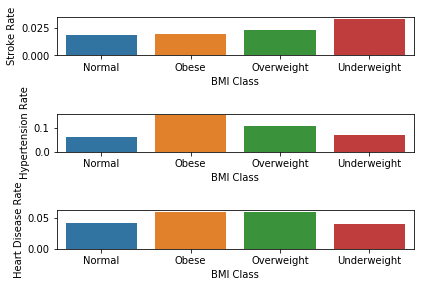

The correlation between bmi and stroke is -0.0114924189718


In [65]:
#create subplots
f, axes = plt.subplots(3, 1)
#bar graph of percentage of stroke victims in each bmi class
sns.barplot(x=grbmimean.index, y=grbmimean.stroke, ax=axes[0])
axes[0].set(ylabel='Stroke Rate',  xlabel='BMI Class')
#bar graph of percentage of people with high blood pressure in each bmi class
sns.barplot(x=grbmimean.index, y=grbmimean.hypertension, ax=axes[1])
axes[1].set(ylabel='Hypertension Rate',  xlabel='BMI Class')
#bar graph of percentage of people who suffer from heart disease in each bmi class
sns.barplot(x=grbmimean.index, y=grbmimean.heart_disease, ax=axes[2])
axes[2].set(ylabel='Heart Disease Rate',  xlabel='BMI Class')
f.tight_layout()
plt.show()
print('The correlation between bmi and stroke is {}').format(np.corrcoef(df.bmi, df.stroke)[1,0])

These results are somewhat surprising. While people classified as overweight or obese are more likely to have heart disease and hypertension, underweight subjects are actually most at risk for stroke. This is bourne out by the fact that the correlation between bmi and stroke is negative. Lets compare the cdfs of bmi on stroke and non stroke victims. This will show us if there are any descrepencies in the distributions.

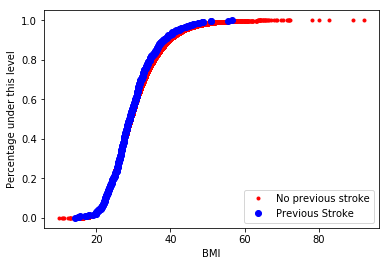

In [66]:
#Use ecdf function to get x, y coordinates cdf's for the bmi for people who have and have not had strokes
strx_bmi,stry_bmi= ecdf(df.bmi[df.stroke==1])
x_norm, y_norm= ecdf(df.bmi[df.stroke==0])
#Plot both lines
plt.plot(x_norm,y_norm, color='red', linestyle='none', marker='.',)
plt.plot(strx_bmi,stry_bmi, color='blue' , linestyle='none', marker='o')
#Label Axis
plt.xlabel('BMI')
plt.ylabel('Percentage under this level')
#Add Legend
plt.legend(('No previous stroke', 'Previous Stroke'),loc='lower right')
plt.show()

There dos not appear to be a significant difference in the distributions. This shows that people tend to have similar BMI's regardless of their history of stroke. Next lets look at glucose level.

In [67]:
#create groupby object grouped by the the classification of glucose 
grglumean=df.groupby('glucose_class').mean()


grglumean

,male,age,hypertension,heart_disease,ever_married,urban_resident,avg_glucose_level,bmi,has_smoked,stroke
glucose_class,,,,,,,,,,
0-20th,0.374271,48.709046,0.100056,0.046455,0.791612,0.508181,65.691877,29.869945,0.231710,0.016739
21st-40th,0.376554,48.239625,0.096194,0.036336,0.781794,0.499904,80.217875,29.845439,0.228151,0.016829
41st-60th,0.364645,48.260187,0.097570,0.041324,0.779032,0.506983,91.700729,29.931930,0.216377,0.013775
61st-80th,0.368680,48.360348,0.096383,0.041091,0.784889,0.493467,107.262820,29.789869,0.221928,0.014202
81st-100th,0.424971,55.976465,0.197296,0.107828,0.859957,0.506259,181.969130,32.369855,0.221666,0.037389


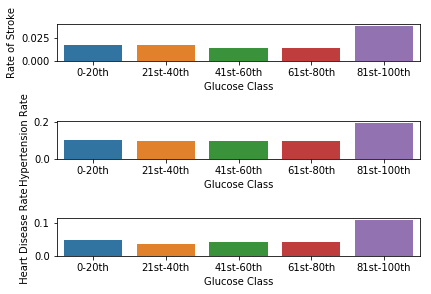

The correlation between glucose level and stroke is 0.0735878549177


In [68]:
#create subplots
f, axes = plt.subplots(3, 1)
#bar graph of percentage of stroke victims in each glucose class
sns.barplot(x=grglumean.index, y=grglumean.stroke, ax=axes[0])
axes[0].set(ylabel='Rate of Stroke',  xlabel='Glucose Class')
#bar graph of percentage of hypertension in each glucose class
sns.barplot(x=grglumean.index, y=grglumean.hypertension, ax=axes[1])
axes[1].set(ylabel='Hypertension Rate',  xlabel='Glucose Class')
#bar graph of percentage of people with heart disease in each glucose class
sns.barplot(x=grglumean.index, y=grglumean.heart_disease, ax=axes[2])
axes[2].set(ylabel=' Heart Disease Rate',  xlabel='Glucose Class')

f.tight_layout()
plt.show()
print('The correlation between glucose level and stroke is {}').format(np.corrcoef(df.avg_glucose_level, df.stroke)[1,0])

It appears there is a threshhold for when an average glucose level becomes too high. We can see this because people in the highest class of average glucose level are at significantly higher risk for hypertension, heart disease and stroke. This shows that despite only a small correlation glucose level can be predictive when is comes to stroke. One caveat to this would be that people with the highest average glucose levels tend to be significantly older.

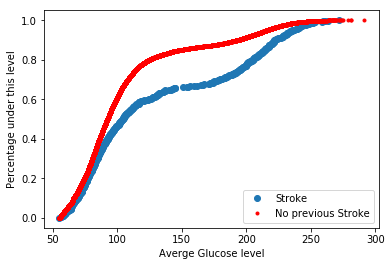

In [14]:
#Use ecdf function to get x, y coordinates cdf's for the glucose level for people who have and have not had strokes
strx_glu,stry_glu= ecdf(df.avg_glucose_level[df.stroke==1])
x_glu, y_glu= ecdf(df.avg_glucose_level[df.stroke==0])
#Plot both lines
plt.plot(strx_glu,stry_glu, linestyle='none', marker='o')
plt.plot(x_glu,y_glu, color='red', linestyle='none', marker='.')
#Label axis
plt.xlabel('Averge Glucose level')
plt.ylabel('Percentage under this level')
#create labels
plt.legend(( 'Stroke','No previous Stroke'),loc='lower right')

plt.show()

As is shown in the figure, stroke victims tend to have extreme glucose levels at one end or another. The large gap between the cdf's in the middle shows that nearly 40% of non stroke victims have glucose levels between 100 and 150 while around 15% of stroke victims are in that group.

In [15]:
#create groupby object by gender
male=df.groupby('male').mean()
male

,age,hypertension,heart_disease,ever_married,urban_resident,avg_glucose_level,bmi,has_smoked,stroke
male,,,,,,,,,
0,49.260262,0.109307,0.037394,0.788278,0.500509,105.390499,30.254024,0.204351,0.018757
1,51.383182,0.136320,0.086117,0.821780,0.507144,110.643314,30.675198,0.255455,0.022688


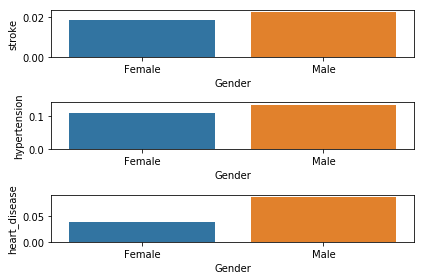

In [16]:
#Create subplots
f, axes = plt.subplots(3, 1)
#bar graph of percentage of stroke victims by gender
sns.barplot(x=male.index, y=male.stroke, ax=axes[0] )
#bar graph of percentage of hypertension by gender
sns.barplot(x=male.index, y=male.hypertension, ax=axes[1])
#bar graph of percentage of heart disease by gender
sns.barplot(x=male.index, y=male.heart_disease, ax = axes[2])
#changes xticks to male and female rather than 0 and 1
for ax in axes:
    plt.sca(ax)
    plt.xticks(np.arange(2),['Female', 'Male'])
    ax.set(xlabel='Gender')
f.tight_layout()
plt.show()

It appears males are at a higher risk of hypertension and stroke and a significantly higer risk of heart disease.

In [19]:
#create a groupby object grouped by wheather or not the subject has smoked
smokegr=df.groupby('has_smoked').mean()
smokegr

,male,age,hypertension,heart_disease,ever_married,urban_resident,avg_glucose_level,bmi,stroke
has_smoked,,,,,,,,,
0,0.367431,50.994426,0.123207,0.054028,0.807137,0.500024,107.664703,30.515389,0.020773
1,0.436922,46.880945,0.107332,0.063078,0.780218,0.513540,106.492774,30.068544,0.018494


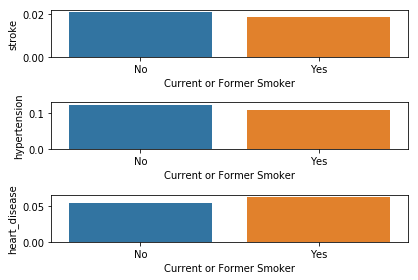

In [20]:
#create subplots
f, axes = plt.subplots(3, 1)
#Bar graph between rate of stroke and whether subject was a smoker
sns.barplot(x=smokegr.index, y=smokegr.stroke, ax=axes[0])
#Bar graph between rate of hypertension and whether subject was a smoker
sns.barplot(x=smokegr.index, y=smokegr.hypertension, ax=axes[1])
#Bar graph between rate of heart disease and whether subject was a smoker
sns.barplot(x=smokegr.index, y=smokegr.heart_disease, ax=axes[2])
#change xticks
for ax in axes:
    plt.sca(ax)
    plt.xticks(np.arange(2),['No', 'Yes'])
    ax.set(xlabel='Current or Former Smoker')
f.tight_layout()

We would expect smoking to increase the likelihood of stroke but the data does not bear that out here. One reason could be that smokers in the study were reletively younger. This is a good place to dive into inferential stats to see if the difference in means between smokers and non smokers a random occurrence. While it may seem obvious that smoking would increase your likelihood of stroke the data does not bear this out at first glance. With this in mind our null hypothesis will be that smoking has no affect on a person's likelihood to have a stroke.

In [21]:

def permutation_sample(data1, data2):
    '''Create a permuted smaple to test hypotheses'''
    data=np.concatenate((data1,data2))
    permuted_data= np.random.permutation(data)
    perm_data1=permuted_data[:len(data1)]
    perm_data2=permuted_data[len(data1):]
    return perm_data1, perm_data2

def permutation_replicate(data1, data2, func, size=1):
    '''Get replicates from permuted sample'''
    replicate=np.empty(size)
    for i in range(size):
        sam1, sam2= permutation_sample(data1, data2)
        replicate[i]= func(sam1, sam2)
    return replicate


def mean_diff(data1, data2):
    '''obtain the mean difference between 2 samples'''
    diff= np.mean(data1)-np.mean(data2)
    return diff
        
    
def mean_ratio(data1,data2):
    '''obtain the mean ratio between 2 samples'''
    ratio=np.mean(data1)/np.mean(data2)
    return ratio

In [22]:
#h0 will be that smoking has no affect on stroke

#seperate into smokers and non-smokers
smoker_str=np.array(df.stroke[df.has_smoked==1])
nonsmoker_str=np.array(df.stroke[df.has_smoked==0])
#get observed quantities
smo_obsv_rat=mean_ratio( smoker_str, nonsmoker_str)
smo_obsv_diff= nonsmoker_str.mean()-smoker_str.mean()


In [23]:
#create permuted samples
smoker_mean_perm_reps=permutation_replicate(smoker_str, nonsmoker_str, mean_diff, size= 10000)
smoker_ratio_perm_reps=permutation_replicate(smoker_str, nonsmoker_str, mean_ratio, size= 10000)

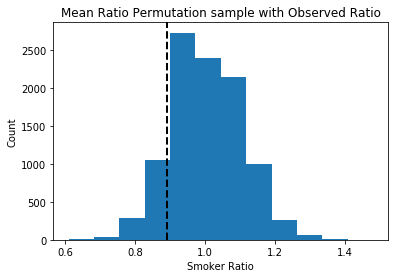

In [24]:
#create histogram
plt.hist(smoker_ratio_perm_reps, bins= 12)
plt.ylabel('Count')
plt.xlabel('Smoker Ratio')
plt.title('Mean Ratio Permutation sample with Observed Ratio')
#show where observed ratio falls in the distribution
plt.axvline(smo_obsv_rat, color='k', linestyle='dashed', linewidth=2)

In [25]:
#Find p-value and 95% CI and print
p=((smoker_ratio_perm_reps>smo_obsv_rat).sum())/float(len(smoker_ratio_perm_reps))
ci =np.percentile(smoker_ratio_perm_reps,(2.5,97.5))
print('Assuming no difference between the affects of smoking on having a stroke the p_value is {}. While this p_value is somewhat low, it is not low enoguh to reject the null').format(p)
print('Additionally the 95% confidence interval is between {} and {}').format(ci[0], ci[1])

Assuming no difference between the affects of smoking on having a stroke the p_value is 0.8615. While this p_value is somewhat low, it is not low enoguh to reject the null
Additionally the 95% confidence interval is between 0.81181346472 and 1.21218300785


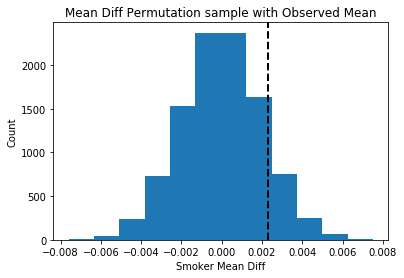

In [26]:
#create histogram
plt.hist(smoker_mean_perm_reps, bins= 12)
plt.ylabel('Count')
plt.xlabel('Smoker Mean Diff')
plt.title('Mean Diff Permutation sample with Observed Mean')
#show where observed mean diff falls in the distribution
plt.axvline(smo_obsv_diff, color='k', linestyle='dashed', linewidth=2)

In [27]:
#Find p-value and 95% CI and print
p=((smoker_mean_perm_reps>smo_obsv_diff).sum())/float(len(smoker_mean_perm_reps))
ci =np.percentile(smoker_mean_perm_reps,(2.5,97.5))
print('Assuming no difference between the affects of smoking on having a stroke the p_value is {}.').format(p)
print('Additionally the 95% confidence interval is between {} and {}').format(ci[0], ci[1])

Assuming no difference between the affects of smoking on having a stroke the p_value is 0.1295.
Additionally the 95% confidence interval is between -0.00398088625778 and 0.00410435471861


According to this permutation sampling there is no increased risk of stroke do to smoking. Any cursory research would show otherwise so I believe this has to be do to how the smoking record was kept. As perviously mentioned, the average smoker in this dataset is four years younger than the non smokers so that may counteract the negative affect of smoking. This could be do to people not being completely forthcoming with their smoking history. Additionally, my wrangling of the data may have caused have overestimated the amount of people whose health was adversly effected by smoking. We may need to drop this variable for future analysis.

In [28]:
#h0 will be that urban vs rural residence has no affect on stroke

#seperate into urban and rural
urban_str=np.array(df.stroke[df.urban_resident==1])
rural_str=np.array(df.stroke[df.urban_resident==0])
#get observed quantities
urb_obsv_rat=mean_ratio(urban_str, rural_str)
urb_obsv_diff= urban_str.mean()-rural_str.mean()

In [29]:
#create permuted samples
urb_mean_perm_reps=permutation_replicate(urban_str, rural_str, mean_diff, size= 10000)
urb_ratio_perm_reps=permutation_replicate(urban_str, rural_str, mean_ratio, size= 10000)

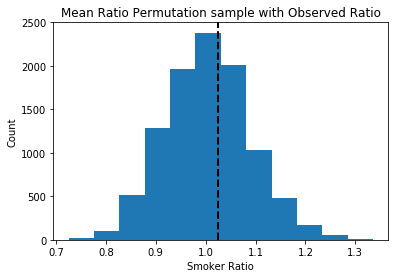

In [30]:
#create histogram
plt.hist(urb_ratio_perm_reps, bins= 12)
plt.ylabel('Count')
plt.xlabel('Smoker Ratio')
plt.title('Mean Ratio Permutation sample with Observed Ratio')
#show where observed ratio falls in the distribution
plt.axvline(urb_obsv_rat, color='k', linestyle='dashed', linewidth=2)

In [31]:
#Find p-value and 95% CI and print
p=((urb_ratio_perm_reps>urb_obsv_rat).sum())/float(len(urb_ratio_perm_reps))
ci =np.percentile(urb_ratio_perm_reps,(2.5,97.5))
print('Assuming no difference between the affects of smoking on having a stroke the p_value is {}.').format(p)
print('Additionally the 95% confidence interval is between {} and {}').format(ci[0], ci[1])

Assuming no difference between the affects of smoking on having a stroke the p_value is 0.3752.
Additionally the 95% confidence interval is between 0.847225907723 and 1.17754355017


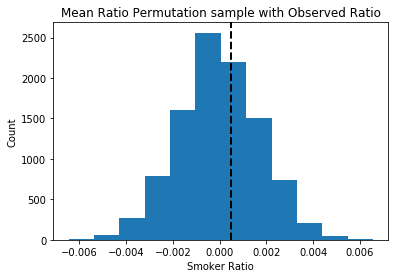

In [32]:
#create histogram
plt.hist(urb_mean_perm_reps, bins= 12)
plt.ylabel('Count')
plt.xlabel('Smoker Ratio')
plt.title('Mean Ratio Permutation sample with Observed Ratio')
#show where observed ratio falls in the distribution
plt.axvline(urb_obsv_diff, color='k', linestyle='dashed', linewidth=2)

In [33]:
#Find p-value and 95% CI and print
p=((urb_mean_perm_reps>urb_obsv_diff).sum())/float(len(urb_mean_perm_reps))
ci =np.percentile(urb_mean_perm_reps,(2.5,97.5))
print('Assuming no difference between the affects of smoking on having a stroke the p_value is {}.').format(p)
print('Additionally the 95% confidence interval is between {} and {}').format(ci[0], ci[1])

Assuming no difference between the affects of smoking on having a stroke the p_value is 0.3732.
Additionally the 95% confidence interval is between -0.00335330038851 and 0.00345042854518


Here both p values show we should accept the null. Urban vs rural residency does not affect ones likelihood of stroke.

In [34]:
#h0 will be that marriage has no affect on stroke
#seperate those who are married and single 
married_str=np.array(df.stroke[df.ever_married==1])
single_str=np.array(df.stroke[df.ever_married==0])
mar_obsv_rat=mean_ratio(married_str, single_str)
mar_obsv_diff= married_str.mean()-single_str.mean()


In [35]:
#create permuted samples
mar_mean_perm_reps=permutation_replicate(married_str, single_str, mean_diff, size= 10000)
mar_ratio_perm_reps=permutation_replicate(married_str, single_str, mean_ratio, size= 10000)

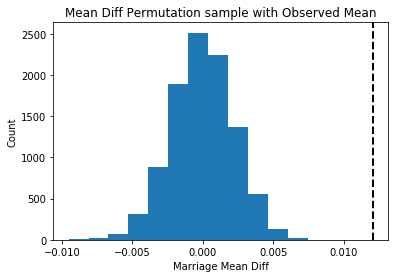

In [36]:
#create histogram
plt.hist(mar_mean_perm_reps, bins= 12)
plt.ylabel('Count')
plt.xlabel('Marriage Mean Diff')
plt.title('Mean Diff Permutation sample with Observed Mean')
#show where observed mean diff falls in the distribution
plt.axvline(mar_obsv_diff, color='k', linestyle='dashed', linewidth=2)

In [37]:
#Find p-value and 95% CI and print
p=((mar_mean_perm_reps>mar_obsv_diff).sum())/float(len(mar_mean_perm_reps))
ci =np.percentile(mar_mean_perm_reps,(2.5,97.5))
print('Assuming no difference between the affects of gender on having a stroke the p_value is {}. This p value means we should reject the null').format(p)
print('Additionally the 95% confidence interval is between {} and {}').format(ci[0], ci[1])

Assuming no difference between the affects of gender on having a stroke the p_value is 0.0. This p value means we should reject the null
Additionally the 95% confidence interval is between -0.00441103280247 and 0.00394325059416


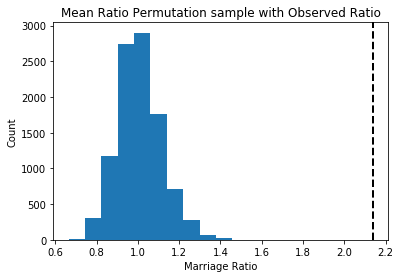

In [38]:
#create histogram
plt.hist(mar_ratio_perm_reps, bins= 12)
plt.ylabel('Count')
plt.xlabel('Marriage Ratio')
plt.title('Mean Ratio Permutation sample with Observed Ratio')
#show where observed ratio falls in the distribution
plt.axvline(mar_obsv_rat, color='k', linestyle='dashed', linewidth=2)

In [39]:
#Find p-value and 95% CI and print
p=((mar_ratio_perm_reps>mar_obsv_rat).sum())/float(len(mar_ratio_perm_reps))
ci =np.percentile(mar_ratio_perm_reps,(2.5,97.5))
print('Assuming no difference between the affects of gender on having a stroke the p_value is {}. This p value means we should reject the null').format(p)
print('Additionally the 95% confidence interval is between {} and {}').format(ci[0], ci[1])

Assuming no difference between the affects of gender on having a stroke the p_value is 0.0. This p value means we should reject the null
Additionally the 95% confidence interval is between 0.823002549079 and 1.24680235301


In [40]:
df.groupby('ever_married').mean()

,male,age,hypertension,heart_disease,urban_resident,avg_glucose_level,bmi,has_smoked,stroke
ever_married,,,,,,,,,
0,0.343186,35.498420,0.055215,0.021751,0.501394,98.876431,29.432348,0.247444,0.010597
1,0.392874,53.691821,0.135650,0.064571,0.503462,109.518987,30.659374,0.218084,0.022662


This result very much surprised me. We did not even examine marriage in our EDA because I assumed it would not have a great affect on ones likelihood to have a stroke. As we can see thoug in the table above the maim reason marriage appears to increase your risk of stroke is that married people tend to be older

In [41]:
#h0 will be that gender has no affect on stroke
#seperate those who do and do not have heart disease 
male_str=np.array(df.stroke[df.male==1])
female_str=np.array(df.stroke[df.male==0])
gen_obsv_rat=mean_ratio(male_str, female_str)
gen_obsv_diff= male_str.mean()-female_str.mean()


In [42]:
#create permuted samples
gender_mean_perm_reps=permutation_replicate(male_str, female_str, mean_diff, size= 10000)
gender_ratio_perm_reps=permutation_replicate(male_str, female_str, mean_ratio, size= 10000)

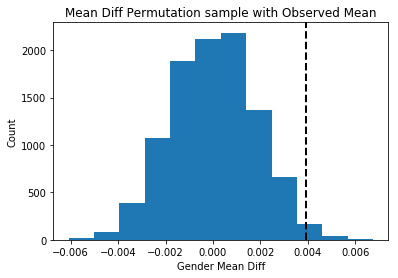

In [43]:
#create histogram
plt.hist(gender_mean_perm_reps, bins= 12)
plt.ylabel('Count')
plt.xlabel('Gender Mean Diff')
plt.title('Mean Diff Permutation sample with Observed Mean')
#show where observed mean diff falls in the distribution
plt.axvline(gen_obsv_diff, color='k', linestyle='dashed', linewidth=2)

In [44]:
#Find p-value and 95% CI and print
p=((gender_mean_perm_reps>gen_obsv_diff).sum())/float(len(gender_mean_perm_reps))
ci =np.percentile(gender_mean_perm_reps,(2.5,97.5))
print('Assuming no difference between the affects of gender on having a stroke the p_value is {}. This p value means we should reject the null').format(p)
print('Additionally the 95% confidence interval is between {} and {}').format(ci[0], ci[1])

Assuming no difference between the affects of gender on having a stroke the p_value is 0.0118. This p value means we should reject the null
Additionally the 95% confidence interval is between -0.00342345805968 and 0.00346124937462


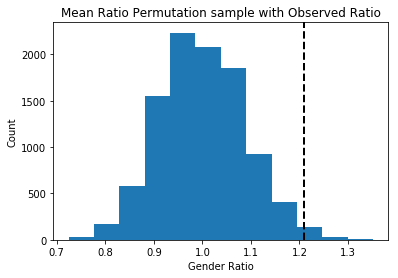

In [45]:
#create histogram
plt.hist(gender_ratio_perm_reps, bins= 12)
plt.ylabel('Count')
plt.xlabel('Gender Ratio')
plt.title('Mean Ratio Permutation sample with Observed Ratio')
#show where observed ratio falls in the distribution
plt.axvline(gen_obsv_rat, color='k', linestyle='dashed', linewidth=2)

In [46]:
#Find p-value and 95% CI and print
p=((gender_ratio_perm_reps>gen_obsv_rat).sum())/float(len(gender_ratio_perm_reps))
ci =np.percentile(gender_ratio_perm_reps,(2.5,97.5))
print('Assuming no difference between the affects of gender on having a stroke the p_value is {}. This p value means we should reject the null').format(p)
print('Additionally the 95% confidence interval is between {} and {}').format(ci[0], ci[1])

Assuming no difference between the affects of gender on having a stroke the p_value is 0.0104. This p value means we should reject the null
Additionally the 95% confidence interval is between 0.841313209328 and 1.18277806429


Both graphs show we should reject the null that gender has no affect on risk of stroke. It is clear that males are at a higher risk of stroke

In [47]:
#h0 will be that heart disease has no affect on stroke
#seperate those who do and do not have heart disease 
hd_str=np.array(df.stroke[df.heart_disease==1])
nohd_str=np.array(df.stroke[df.heart_disease==0])
hd_obsv_rat=mean_ratio(hd_str, nohd_str)
hd_obsv_diff= hd_str.mean()-nohd_str.mean()


In [48]:
#get permuted samples of each
hd_mean_perm_reps=permutation_replicate(hd_str, nohd_str, mean_diff, size= 10000)
hd_ratio_perm_reps=permutation_replicate(hd_str, nohd_str, mean_ratio, size= 10000)

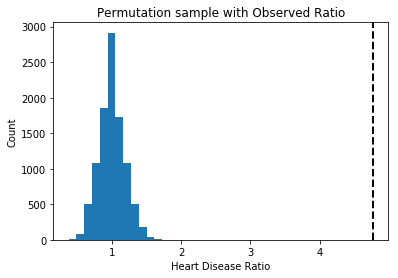

In [49]:
#create histogram
plt.hist(hd_ratio_perm_reps, bins= 12)
plt.ylabel('Count')
plt.xlabel('Heart Disease Ratio')
plt.title('Permutation sample with Observed Ratio')
#show observed mean ratio
plt.axvline(hd_obsv_rat, color='k', linestyle='dashed', linewidth=2)

In [50]:
#display p-value
p=((hd_ratio_perm_reps>hd_obsv_rat).sum())/float(len(smoker_ratio_perm_reps))
print('Assuming heart disease has no effect on the likelihood of stroke the p value is {}. This low value shows we must reject the null.').format(p)

Assuming heart disease has no effect on the likelihood of stroke the p value is 0.0. This low value shows we must reject the null.


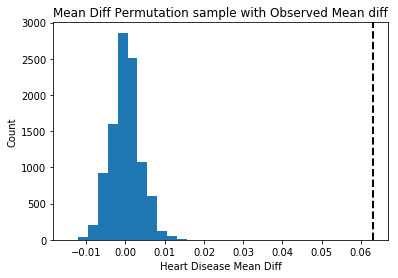

In [51]:
#create histogram
plt.hist(hd_mean_perm_reps, bins= 12)
plt.ylabel('Count')
plt.xlabel('Heart Disease Mean Diff')
plt.title('Mean Diff Permutation sample with Observed Mean diff')
#show observed mean difference
plt.axvline(hd_obsv_diff, color='k', linestyle='dashed', linewidth=2)

In [52]:
#display p
p=((hd_mean_perm_reps>hd_obsv_rat).sum())/float(len(hd_mean_perm_reps))
print('Assuming heart disease has no effect on the likelihood of stroke the p value is {}.').format(p)

Assuming heart disease has no effect on the likelihood of stroke the p value is 0.0.


In [53]:
#h0 will be that hypertension has no affect on stroke
#seperate those who have hypertension from those who don't
hype_str=np.array(df.stroke[df.hypertension==1])
nohype_str=np.array(df.stroke[df.hypertension==0])

hyp_obsv_rat=mean_ratio(hype_str, nohype_str)
hyp_obsv_diff= hype_str.mean()-nohype_str.mean()


In [54]:
#create permutation samples
hype_mean_perm_reps=permutation_replicate(hype_str, nohype_str, mean_diff, size= 10000)
hype_ratio_perm_reps=permutation_replicate(hype_str, nohype_str, mean_ratio, size= 10000)

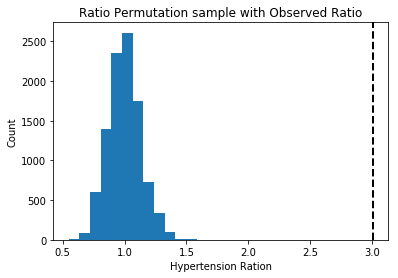

In [55]:
#create histogram
plt.hist(hype_ratio_perm_reps, bins= 12)
plt.ylabel('Count')
plt.xlabel('Hypertension Ration')
plt.title('Ratio Permutation sample with Observed Ratio')
#plot observed ratio
plt.axvline(hyp_obsv_rat, color='k', linestyle='dashed', linewidth=2)

In [56]:
#display p-value
p=((hype_ratio_perm_reps>hyp_obsv_rat).sum())/float(len(hype_ratio_perm_reps))
print('Assuming hypertension has no effect on the likelihood of stroke the p value is {}.').format(p)

Assuming hypertension has no effect on the likelihood of stroke the p value is 0.0.


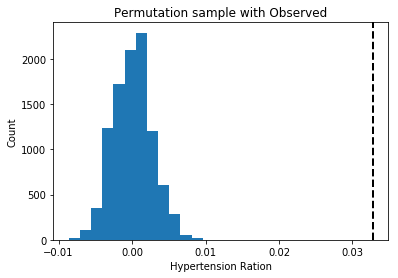

In [57]:
#plot histogram
plt.hist(hype_mean_perm_reps, bins= 12)
plt.ylabel('Count')
plt.xlabel('Hypertension Ration')
plt.title('Permutation sample with Observed')
#plot observed mean diff
plt.axvline(hyp_obsv_diff, color='k', linestyle='dashed', linewidth=2)

In [58]:
#display p value
p=((hype_ratio_perm_reps>hyp_obsv_rat).sum())/float(len(hype_ratio_perm_reps))
print('Assuming hypertension has no effect on the likelihood of stroke the p value is {}.').format(p)

Assuming hypertension has no effect on the likelihood of stroke the p value is 0.0.


The permutation sampling shows that the major affects that hypertension and heart disease had on the rate of stroke are clearly beyond random chance. This means that heart disease and hypertension will be very important factors for our predictive model.